In [ ]:
#!wget --no-check-certificate 'https://docs.google.com/file/d/1EW5D5qNH2FOYORcY-GMbi6RYeQXfmPnf' -O household_power_consumption.txt
#import pandas as pd
#pd.read_csv('/content/household_power_consumption.txt').head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/household_power_consumption.txt')

AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('household_power_consumption.txt', delimiter=';',low_memory=True)
data=pd.DataFrame(data)
data=data.drop('Time',axis=1)
data=data.drop('Date',axis=1)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
#data.Date=pd.to_datetime(data.Date)

data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
data.replace('?',np.nan,inplace=True)

In [ ]:
data.fillna(method='ffill',inplace=True)

In [ ]:
list1=['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
data[list1]=data[list1].astype(np.float64)

In [ ]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
list=['Sub_metering_1','Sub_metering_2','Sub_metering_3']

In [ ]:
X=pd.DataFrame(data.drop(list,axis=1))
y=pd.DataFrame((data[list]),dtype=np.float64)

In [ ]:
X.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
dtype: object

In [ ]:
y.dtypes

Sub_metering_1    float64
Sub_metering_2    float64
Sub_metering_3    float64
dtype: object

In [ ]:
Y=pd.DataFrame(np.array(y['Sub_metering_1'])/3+np.array(y['Sub_metering_1'])/3+np.array(y['Sub_metering_1'])/3,dtype=np.float64)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.90,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X= StandardScaler()
X_trainscaled=scaler_X.fit_transform(X_train)
X_testscaled=scaler_X.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
R=reg.fit(X_train, y_train)
y_pred=R.predict(X_testscaled)


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred,squared=False)

40.18216228729159

***USING SVR***

In [ ]:
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
Y = np.array(Y).reshape(-1,1)
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.000,1.000,17.0
1,5.360,0.436,233.63,23.0,0.000,1.000,16.0
2,5.374,0.498,233.29,23.0,0.000,2.000,17.0
3,5.388,0.502,233.74,23.0,0.000,1.000,17.0
4,3.666,0.528,235.68,15.8,0.000,1.000,17.0


In [ ]:
Y = np.array(Y).reshape(-1,1)

In [ ]:
X

array([4.216, 5.36 , 5.374, ..., 0.938, 0.934, 0.932])

In [ ]:
Y

array([[0.418],
       [0.436],
       [0.498],
       ...,
       [0.   ],
       [0.   ],
       [0.   ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
Y = sc_y.fit_transform(Y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [ ]:
data = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,-1.399012,-1.004401
1,-0.998611,-0.923898
2,-1.646119,-1.018360
3,-1.624887,-1.018239
4,16.642982,16.577703
...,...,...
136068,-0.290869,-0.612977
136069,-1.646119,-1.018360
136070,16.548868,16.547968
136071,-1.646119,-1.018360


In [ ]:
import matplotlib.pyplot as plt


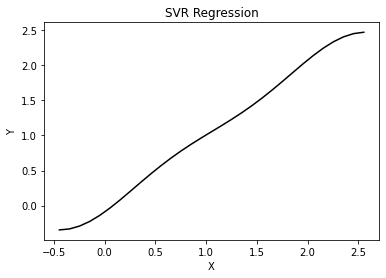

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()